# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('./data/sat_2017.csv')
act_2017 = pd.read_csv('./data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: Without performing any functions/operations on the data, it shows the average national % of participation in the SAT/ACTs as well as average % of participation in SAT/ACTs for each state and DC.
Average total scores and scores in each category are also shown.

#### 4a. Does the data look complete? 

Answer: Yes. It shows the National average data as well the data for all 50 states and DC.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
act_2017['Composite'].min()

'17.8'

In [6]:
act_2017['English'].min()

16.3

In [7]:
act_2017['Math'].min()

18.0

In [8]:
act_2017['Reading'].min()

18.1

In [9]:
act_2017['Science'].min()

2.3

In [10]:
sat_2017['Total'].min()

950

In [11]:
sat_2017['Evidence-Based Reading and Writing'].min()

482

In [12]:
sat_2017['Math'].min()

52

Answer:
ACT
Min composite: 17.8
Min English: 16.3
Min Math: 18.0
Min Reading: 18.1
Min Science: 2.3

SAT
Min Total: 950
Min Evidence-Based Reading and Writing: 482
Min Math: 52

# 
#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

No errors found

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [14]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

At first glance, 'Participation' column in the SAT df would be assumed to be int or float; but it is string because of the '%' symbol.
Same goes for the ACT 'Participation' column. However, ACT 'Composite' would be assumed to be comprised entirely of numerical values, but shows as type string.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
act_2017['Composite'][51] = act_2017['Composite'][51].replace('x', '')

C:\Users\justanotheregg\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
act_2017['Composite'][51]

'20.2'

In [17]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [18]:
act_2017['Composite'] = pd.to_numeric(act_2017['Composite'])

In [19]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
act_2017['Participation'] = act_2017['Participation'].str.replace('%', '')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [21]:
act_2017['Participation'] = pd.to_numeric(act_2017['Participation'])

In [22]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [23]:
sat_2017['Participation'] = pd.to_numeric(sat_2017['Participation'].str.replace('%', ''))

In [24]:
sat_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [25]:
sat2017_column_dict = {'State': 'state',
                      'Participation': 'sat2017_participation',
                      'Evidence-Based Reading and Writing': 'sat2017_readingwriting',
                      'Math': 'sat2017_math',
                      'Total': 'sat2017_total'}

In [26]:
sat_2017.rename(columns=sat2017_column_dict, inplace=True) 

In [27]:
act_2017_column_dict = {'State': 'state',
                       'Participation': 'act2017_participation',
                       'English': 'act2017_english',
                        'Math': 'act2017_math',
                       'Reading': 'act2017_reading',
                       'Science': 'act2017_science',
                       'Composite': 'act2017_composite'}

In [28]:
act_2017.rename(columns=act_2017_column_dict, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


| Dataset | Column Name | Type | Description |
|---------|-------------|------|-------------|
| SAT 2017| state| object | Name of State in which SAT was taken |
| SAT 2017| sat2017_participation | int| Percentage of pop. participating in SAT|
| SAT 2017| sat2017_readingwriting | int| Average state score on Reading/Writing portion of SAT|
| SAT 2017| sat2017_math | int| Average state score on Math portion of SAT|
| SAT 2017| sat2017_total | int|Average state total score on SAT|



| Dataset | Column Name | Type | Description |
|---------|-------------|------|-------------|
| ACT 2017| state| object | Name of State in which ACT was taken |
| ACT 2017| act2017_participation | int| Percentage of pop. participating in ACT|
| ACT 2017| act2017_english | int| Average state score on English portion of ACT|
| ACT 2017| act2017_math | int| Average state score on Math portion of ACT|
| ACT 2017| act2017_reading | int|Average state score on Reading portion of ACT|
| ACT 2017| act2017_science | int| Average state score on Science portion of ACT| 
| ACT 2017| act2017_composite | int| AVerage state composite score on ACT|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [29]:
act_2017.drop([0], inplace=True)

In [30]:
act_2017.head()

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [31]:
combined_2017 = pd.merge(left = sat_2017,
                           right = act_2017,
                           on = 'state')

In [32]:
combined_2017.head()

,state,sat2017_participation,sat2017_readingwriting,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [33]:
combined_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [34]:
#importing SAT & ACT dataframes
sat_2018 = pd.read_csv('./data/sat_2018.csv')
act_2018 = pd.read_csv('./data/act_2018.csv')

In [35]:
sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Alabama,6%,595.0,571.0,1166.0,NaN,NaN,NaN
1,Alaska,43%,562.0,544.0,1106.0,NaN,NaN,NaN
2,Arizona,29%,577.0,572.0,1149.0,NaN,NaN,NaN
3,Arkansas,5%,592.0,576.0,1169.0,NaN,NaN,NaN
4,California,60%,540.0,536.0,1076.0,NaN,NaN,NaN
5,Colorado,100%,519.0,506.0,1025.0,NaN,NaN,NaN
6,Connecticut,100%,535.0,519.0,1053.0,NaN,NaN,NaN
7,Delaware,100%,505.0,492.0,998.0,NaN,NaN,NaN
8,District of Columbia,92%,497.0,480.0,977.0,NaN,NaN,NaN
9,Florida,56%,550.0,549.0,1099.0,NaN,NaN,NaN


In [36]:
#checking datatypes to spot any inconsistencies
sat_2018.dtypes

State                                  object
Participation                          object
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
Unnamed: 5                            float64
Unnamed: 6                            float64
Unnamed: 7                            float64
dtype: object

In [37]:
#checking whether there are any/enough useful values in the 'Unnamed' columns before deleting them
sat_2018[['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']].sort_values

<bound method DataFrame.sort_values of     Unnamed: 5  Unnamed: 6  Unnamed: 7
0          NaN         NaN         NaN
1          NaN         NaN         NaN
2          NaN         NaN         NaN
3          NaN         NaN         NaN
4          NaN         NaN         NaN
5          NaN         NaN         NaN
6          NaN         NaN         NaN
7          NaN         NaN         NaN
8          NaN         NaN         NaN
9          NaN         NaN         NaN
10         NaN         NaN         NaN
11         NaN         NaN         NaN
12         NaN         NaN         NaN
13         NaN         NaN         NaN
14         NaN         NaN         NaN
15         NaN         NaN         NaN
16         NaN         NaN         NaN
17         NaN         NaN         NaN
18         NaN         NaN         NaN
19         NaN         NaN         NaN
20         NaN         NaN         NaN
21         NaN         NaN         NaN
22         NaN         NaN         NaN
23         NaN         Na

In [38]:
#Dropping the columns full of NaN values
sat_2018.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis =1, inplace=True)

In [39]:
#Removing row 51 that is also entirely NaN values
sat_2018.drop([51], inplace=True)

In [40]:
#Now, because the ACT data shows only the States, composite scores and participation percentages, I will remove the SAT columns that do not correspond to those (i.e. - states, participation % and state total scores), so as to avoid a cluttered table
sat_2018.drop(['Evidence-Based Reading and Writing', 'Math'], axis=1, inplace=True)

In [41]:
#coverting 'Participation' column in type int
sat_2018['Participation'] = pd.to_numeric(sat_2018['Participation'].str.replace('%', ''))

In [42]:
sat_2018

,State,Participation,Total
0,Alabama,6,1166.0
1,Alaska,43,1106.0
2,Arizona,29,1149.0
3,Arkansas,5,1169.0
4,California,60,1076.0
5,Colorado,100,1025.0
6,Connecticut,100,1053.0
7,Delaware,100,998.0
8,District of Columbia,92,977.0
9,Florida,56,1099.0


In [43]:
#Giving the columns more meaningful names
sat2018_column_dict = {'State': 'state',
                      'Participation': 'sat2018_participation',                   
                      'Total': 'sat2018_total'}

In [44]:
sat_2018.rename(columns=sat2018_column_dict, inplace=True)

In [45]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [46]:
act_2018

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


In [47]:
#Removing the last 2 rows holding only 'NaN' values, as well as the duplicate 'Maine' row
act_2018.drop([20,52,53], inplace=True)

In [48]:
act_2018

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


In [49]:
#Converting 'Participation' column into type int
act_2018['Participation'] = pd.to_numeric(act_2018['Participation'].str.replace('%', ''))

In [50]:
#Giving the columns more meaningful names
act2018_column_dict = {'State': 'state',
                      'Participation': 'act2018_participation',                   
                      'Composite': 'act2018_composite'}

act_2018.rename(columns=act2018_column_dict, inplace=True)

In [51]:
#Combining the 2018 ACT & SAT into one dataframe
combined_2018 = pd.merge(left = sat_2018,
                           right = act_2018,
                           on = 'state')

In [52]:
combined_2018

,state,sat2018_participation,sat2018_total,act2018_participation,act2018_composite
0,Alabama,6,1166.0,100,19.1
1,Alaska,43,1106.0,33,20.8
2,Arizona,29,1149.0,66,19.2
3,Arkansas,5,1169.0,100,19.4
4,California,60,1076.0,27,22.7
5,Colorado,100,1025.0,30,23.9
6,Connecticut,100,1053.0,26,25.6
7,Delaware,100,998.0,17,23.8
8,Florida,56,1099.0,66,19.9
9,Georgia,70,1064.0,53,21.4


In [53]:
#Saving new dataframe as csv 
combined_2018.to_csv('combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [54]:
final_df = pd.merge(left = combined_2017,
                           right = combined_2018,
                           on = 'state')

In [55]:
final_df.to_csv('final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [56]:
final_df.describe()

,sat2017_participation,sat2017_readingwriting,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_total,act2018_participation,act2018_composite
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,38.600000,570.860000,549.220000,1129.620000,65.920000,20.862000,21.13600,21.956000,20.992000,21.466000,44.820000,1122.880000,62.320000,21.454000
std,34.560211,44.385146,84.998269,89.913085,32.110676,2.324307,1.97399,2.046317,3.195139,2.004241,37.097604,92.845634,34.114118,2.111312
min,2.000000,503.000000,52.000000,996.000000,8.000000,16.300000,18.00000,18.100000,2.300000,17.800000,2.000000,998.000000,7.000000,17.700000
25%,4.000000,535.250000,523.250000,1057.000000,31.000000,19.000000,19.40000,20.425000,19.900000,19.800000,4.250000,1062.250000,27.750000,19.925000
50%,34.000000,559.500000,549.500000,1107.500000,71.000000,20.550000,20.90000,21.700000,21.100000,21.400000,50.000000,1098.500000,66.000000,21.050000
75%,65.000000,613.500000,601.000000,1214.000000,100.000000,23.100000,23.00000,23.875000,22.275000,23.400000,74.500000,1207.000000,100.000000,23.650000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.30000,26.000000,24.900000,25.500000,100.000000,1298.000000,100.000000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [57]:
import math
def stdev(series):
    sumsqs = [] 
    for i in series:
        ss = (i -(np.mean(series)))**2 
        sumsqs.append(ss)
    avgsumsqs= sum(sumsqs) / (len(sumsqs) - 1)  
    stdev = math.sqrt(avgsumsqs) 
    return stdev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [58]:
{key: (stdev(value)) for key, value in (final_df.select_dtypes(include=[np.number])).iteritems()}
    

{'sat2017_participation': 34.56021069474701,
 'sat2017_readingwriting': 44.38514643988229,
 'sat2017_math': 84.99826888993513,
 'sat2017_total': 89.91308501626924,
 'act2017_participation': 32.110675953708636,
 'act2017_english': 2.3243072261714137,
 'act2017_math': 1.9739900543553606,
 'act2017_reading': 2.0463167508716626,
 'act2017_science': 3.1951391653125665,
 'act2017_composite': 2.0042414209544193,
 'sat2018_participation': 37.09760430132867,
 'sat2018_total': 92.84563445167842,
 'act2018_participation': 34.11411820968687,
 'act2018_composite': 2.1113116147773816}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

They match the pd.describe() outputs, but not the np.std() outputs.
https://stackoverflow.com/questions/24984178/different-std-in-pandas-vs-numpy

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [59]:
sat2017_highestpart = sat_2017['sat2017_participation'].sort_values(ascending=False)

5 States with Highest Participation Rates, 2017 SAT:
Connecticut: 100%
Delaware: 100%
DC : 100%
Michigan: 100%
New Hampshire: 29%

In [60]:
sat2018_highestpart = sat_2018['sat2018_participation'].sort_values(ascending=False)

5 States with Highest Participation Rates, 2018 SAT:
Colorado: 100%
Connecticut: 100%
Delaware: 100%
Idaho: 100%
Michigan: 100%

In [61]:
act2017_highestpart = act_2017['act2017_participation'].sort_values(ascending=False)

5 States with Highest Participation Rates, 2017 ACT:
Wyoming: 100%
Arkansas: 100%
Kentucky: 100%
Oklahoma: 100%
Colorado: 100%

In [62]:
act2018_highestpart = act_2018['act2018_participation'].sort_values(ascending=False)

5 States with Highest Participation Rates, 2018 ACT:
WYoming: 100%
Arkansas: 100%
Kentucky: 100%
Oklahoma: 100%
Louisiana: 100%

In [ ]:
#Lowest Participation

In [63]:
mask = sat_2017['sat2017_participation']<5
sat_2017[mask].sort_values('sat2017_participation')

,state,sat2017_participation,sat2017_readingwriting,sat2017_math,sat2017_total
15,Iowa,2,641,635,1275
24,Mississippi,2,634,607,1242
34,North Dakota,2,635,621,1256
3,Arkansas,3,614,594,1208
23,Minnesota,3,644,651,1295
25,Missouri,3,640,631,1271
27,Nebraska,3,629,625,1253
41,South Dakota,3,612,603,1216
44,Utah,3,624,614,1238
49,Wisconsin,3,642,649,1291


5 States with Lowest Participation Rates, 2017 SAT:
North Dakota: 2%
Mississippi: 2%
Iowa, 2%
Missouri: 3%
Utah: 3%

In [64]:
sat2018_lowestpart = sat_2018['sat2018_participation'].sort_values()

5 States with Lowest Participation Rates, 2018 SAT:
North Dakota: 2%
Nebraska: 3%
South Dakota: 3%
Wisconsin: 3%
Wyoming: 3%

In [65]:
act2017_lowestpart = act_2017['act2017_participation'].sort_values()

5 States with Lowest Participation Rates, 2017 ACT:
Maine:8%
New Hampshire: 18%
Delaware: 18%
Rhode Island: 21%
Pennsylvania: 23%

In [66]:
act2018_lowestpart = act_2018['act2018_participation'].sort_values()

5 States with Lowest Participation Rates, 2018 ACT:
Maine: 7%
Rhode Island: 15%
New Hampshire: 16%
Delaware: 17%
Pennsylvania: 20%

In [ ]:
#Highest Mean Total

In [78]:
sat2017_highesttotal= sat_2017['sat2017_total'].sort_values(ascending=False)[0]
sat2017_highesttotal

1165

In [79]:
sat2018_highesttotal = sat_2018['sat2018_total'].sort_values(ascending=False)[0]
sat2018_highesttotal

1166.0

In [ ]:
#Highest Mean Composite

In [85]:
act2017_highestcomposite = act_2017['act2017_composite'].sort_values(ascending=False)
act2017_highestcomposite
#25.5

30    25.5
22    25.4
7     25.2
20    24.3
9     24.2
33    24.2
23    24.1
8     24.1
40    24.0
31    23.9
47    23.8
39    23.7
21    23.6
46    23.6
5     22.8
15    22.6
13    22.3
36    22.0
16    21.9
48    21.9
42    21.8
38    21.8
17    21.7
24    21.5
28    21.4
11    21.4
14    21.4
6     20.8
44    20.7
50    20.5
49    20.4
26    20.4
27    20.3
35    20.3
45    20.3
51    20.2
18    20.0
10    19.8
43    19.8
2     19.8
32    19.7
3     19.7
19    19.5
37    19.4
4     19.4
1     19.2
34    19.1
12    19.0
41    18.7
25    18.6
29    17.8
Name: act2017_composite, dtype: float64

In [87]:
act2018_highestcomposite = act_2018['act2018_composite'].sort_values(ascending=False)[0]
act2018_highestcomposite

19.1

In [ ]:
#Lowest Mean Total

In [88]:
sat2017_lowesttotal = sat_2017['sat2017_total'].sort_values()[0]
sat2017_lowesttotal

1165

In [89]:
sat2018_lowesttotal = sat_2018['sat2018_total'].sort_values()[0]

In [ ]:
#Lowest Mean Composite

In [96]:
act2017_lowestcomposite = act_2017['act2017_composite'].sort_values()
act2017_lowestcomposite
#17.8

29    17.8
25    18.6
41    18.7
12    19.0
34    19.1
1     19.2
4     19.4
37    19.4
19    19.5
3     19.7
32    19.7
2     19.8
43    19.8
10    19.8
18    20.0
51    20.2
45    20.3
35    20.3
27    20.3
26    20.4
49    20.4
50    20.5
44    20.7
6     20.8
14    21.4
11    21.4
28    21.4
24    21.5
17    21.7
38    21.8
42    21.8
48    21.9
16    21.9
36    22.0
13    22.3
15    22.6
5     22.8
46    23.6
21    23.6
39    23.7
47    23.8
31    23.9
40    24.0
8     24.1
23    24.1
33    24.2
9     24.2
20    24.3
7     25.2
22    25.4
30    25.5
Name: act2017_composite, dtype: float64

In [98]:
act2018_lowestcomposite = act_2018['act2018_composite'].sort_values()[0]
act2018_lowestcomposite

19.1

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [99]:
final_corr = final_df.corr()

In [100]:
import seaborn as sns

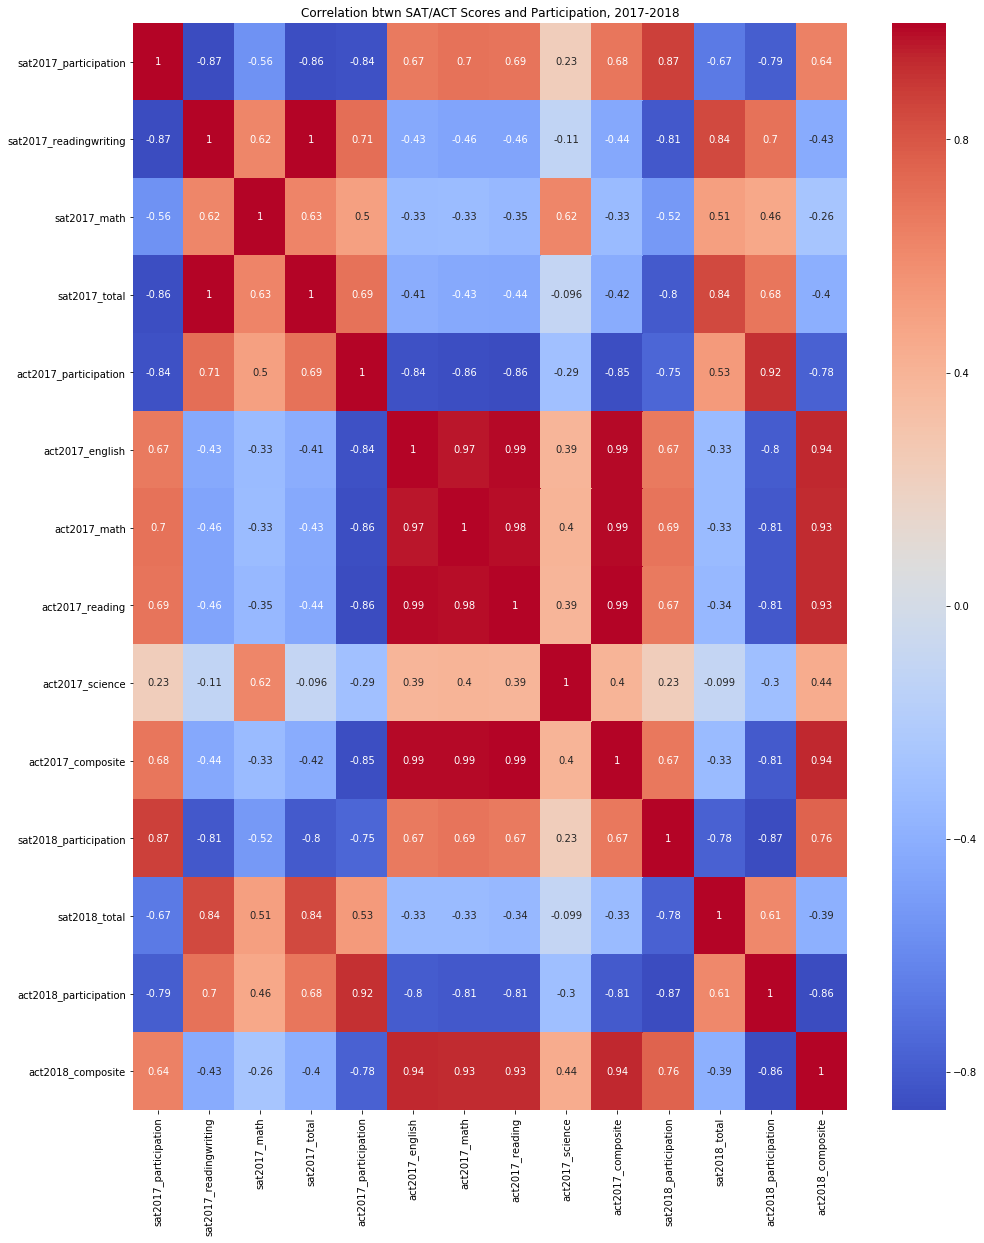

In [101]:
plt.figure(figsize = (16,20))
sns.heatmap(final_corr, cmap='coolwarm', annot=True)
plt.title('Correlation btwn SAT/ACT Scores and Participation, 2017-2018');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [102]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    colors = ['#8EA4D2', '#6279B8', '#49516F']
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    plt.tight_layout()
    fig,ax = plt.subplots(nrows = nrows,ncols =2, figsize=(10,10))# You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = colors[i])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        


<Figure size 432x288 with 0 Axes>

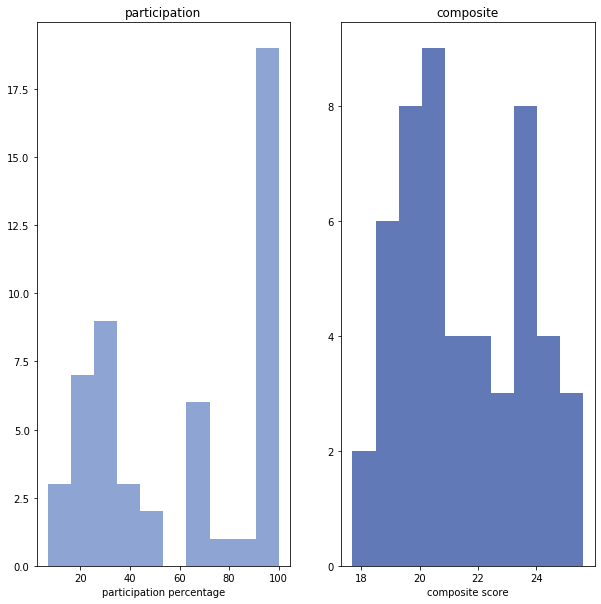

In [104]:
subplot_histograms(act_2018, ['act2018_participation', 'act2018_composite'], ['participation', 'composite'], ['participation percentage', 'composite score'])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

<Figure size 432x288 with 0 Axes>

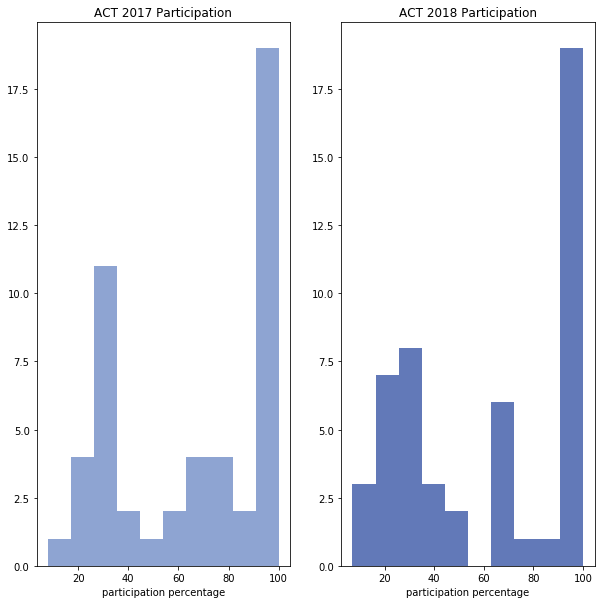

In [105]:
subplot_histograms(final_df, ['act2017_participation', 'act2018_participation'], ['ACT 2017 Participation', 'ACT 2018 Participation'], ['participation percentage','participation percentage']);

<Figure size 432x288 with 0 Axes>

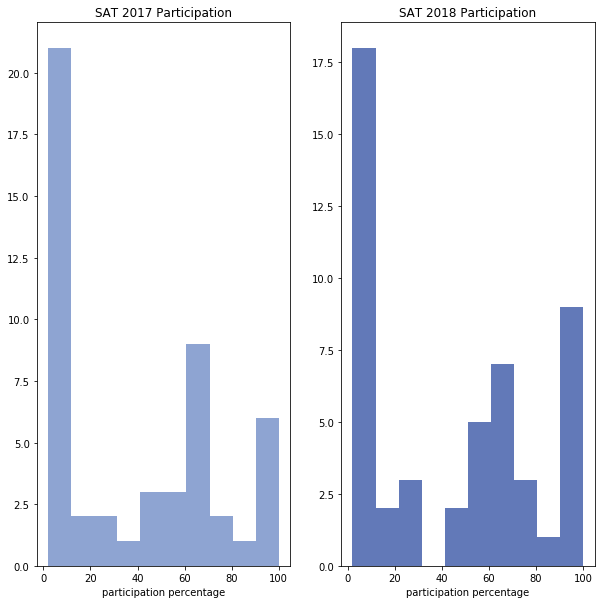

In [106]:
subplot_histograms(final_df, ['sat2017_participation', 'sat2018_participation'], ['SAT 2017 Participation', 'SAT 2018 Participation'], ['participation percentage','participation percentage'])

<Figure size 432x288 with 0 Axes>

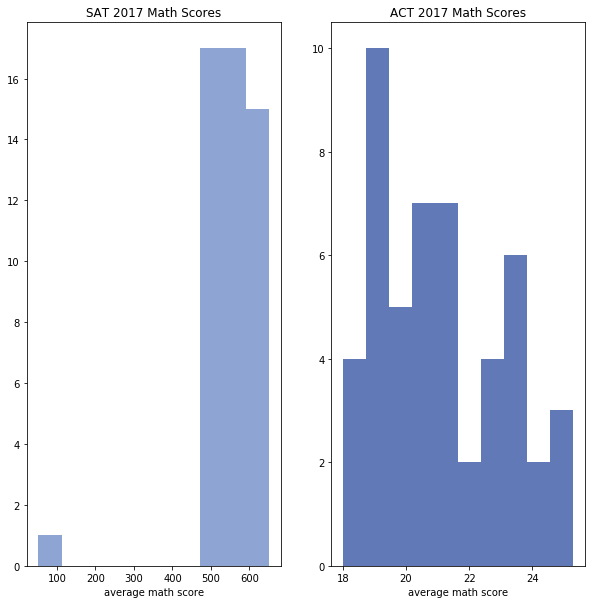

In [107]:
subplot_histograms(final_df, ['sat2017_math', 'act2017_math'], ['SAT 2017 Math Scores', 'ACT 2017 Math Scores'], ['average math score', 'average math score'])

<Figure size 432x288 with 0 Axes>

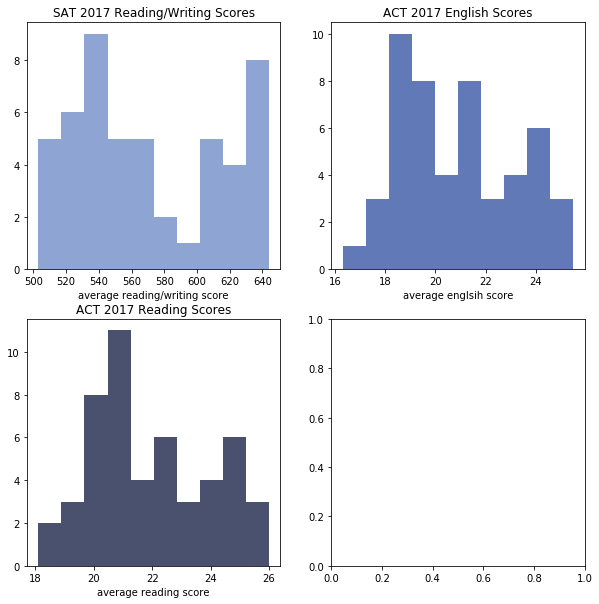

In [108]:
subplot_histograms(final_df, ['sat2017_readingwriting', 'act2017_english', 'act2017_reading'], ['SAT 2017 Reading/Writing Scores', 'ACT 2017 English Scores', 'ACT 2017 Reading Scores'], ['average reading/writing score', 'average englsih score', 'average reading score'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


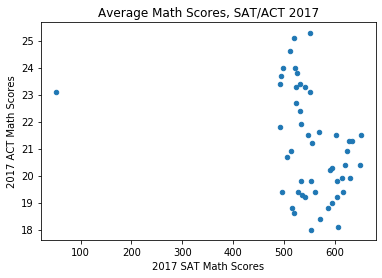

In [109]:
final_df.plot.scatter('sat2017_math', 'act2017_math')
plt.title ('Average Math Scores, SAT/ACT 2017')
plt.xlabel('2017 SAT Math Scores')
plt.ylabel('2017 ACT Math Scores');
#try with list of 2017s as x, numbers as y?

In [ ]:
final_df.plot.scatter('sat2017_readingwriting', 'act2017_reading')
plt.title ('Average Reading Scores, SAT/ACT 2017')
plt.xlabel('2017 SAT Reading/Writing Scores')
plt.ylabel('2017 ACT Reading Scores');

In [ ]:
final_df.plot.scatter('sat2017_total', 'act2017_composite')
plt.title ('Average Total/Composite Scores, SAT/ACT 2017')
plt.xlabel('2017 SAT Total Scores')
plt.ylabel('2017 ACT Composite Scores');

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
all_act = (pd.concat([act_2017, act_2018])).drop(['act2017_participation', 'act2018_participation'], axis=1)
ax = sns.boxplot(data = all_act)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('ACT Scores 2017-2018');

In [ ]:
allpart = pd.concat([combined_2017, combined_2018], axis=1)
ax = sns.boxplot(data = (allpart['sat2017_participation'], allpart['sat2018_participation'], allpart['act2017_participation'], allpart['act2018_participation']))
ax.set_xticklabels(['sat_2017', 'sat_2018', 'act_2017', 'act_2018'],rotation=30)
ax.set_title('SAT/ACT Participation Percentages, 2017-2018')
;

In [ ]:
sat_num = (pd.concat([sat_2017, sat_2018])).drop(['sat2017_participation', 'sat2018_participation'], axis=1)
ax = sns.boxplot(data = sat_num)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('SAT Scores 2017-2018');

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:
- States that had lower participation in the SAT/ACT had greater scores in those inverse exams.
- Overall the national participation rate for the ACT was higher than that of the SAT.
^ In 2017, average SAT participation was 40% while average ACT was 65%.
- On average, students did better on eading sections than math sections.
^for the SAT, the 2017 average reading score was 570 while math was 557.
^for the ACT the 2017 average reading score was 22 while math was 21.
- Participation for the SAT increased from 2017 to 2018 while participation for the ACT decreased from 2017 to 2018.
- However, changes in total test scores of both exams were not significant
- Only 4% of states had participation rates of 100% in SAT

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
Math and Reading score distributions were right skewed
SAT participation distribution wwas right skewed
ACT participation distribution was left skewed

Using skewed data influences inferences poorly, because it creates an overall inaccurate view.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
No. The participation in both these tests is influenced differently based on many factors.
Geography, state requirements, cost of testing/preparation, to name a few.
Additionally, the SAT and the ACT are two very different tests, meaning content is not uniform across and therefore student performance cannot be measured by the same metric for the two tests.
It would be irresponsible to compare participation for the two side by side and accept any results without taking into account these inconsistencies.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No, for the same reasons as above. They are different tests, with different material, preparation methods, and scoring rubrics.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Arkansas, Kentucky, Mississippi.
In all these states, participation in the ACT was extremely high compared to the SAT. While Arkansas does not require either test, both Kentucky and Mississippi do require the ACT. All of these states fund the cost for students who take the ACT.  However, in all these states, test scores for the ACT were either not particularly higher than those for the SAT, or considerably worse. 
These are also states whose poverty rates are below the national average, implying their access to preparation for either test is likely scarce, and cost of testing/prep plays a large part in which test is taken and how their performance ranks.
(https://www.washingtonpost.com/news/wonk/wp/2014/03/05/these-four-charts-show-how-the-sat-favors-the-rich-educated-families/?utm_term=.410d9395c78d)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Focusing on Arkansas, my recommendation would be to provide state & College Board funded prep classes for the SAT, or to somehow include it in public high school's curriculuum. Funded testing centers or a fee waiver for students who meet certain criteria would also expand the interest and accessibility for all students/parents.
I would have liked to have data on test scores for different counties within Arkansas, along with more data on the specific schools (public and private)students attended and the socioeconomic makeup of these counties and schools.